## GreyWolf Optimizer

In [1]:
!pip install numpy
!pip install matplotlib

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class wolf:
    
    def __init__(self, dim):
        self.position = 100 * np.random.rand(dim)
        self.obj_score = float('inf')

In [ ]:
def GWO(obj_fun, soln_dim, wolves_n, iter_n):
    
    # obj_fun   - objective function to be minimized
    # soln_dim  - dimension of solution vector
    # wolves_n  - no. of searching wolves
    # iter_n    - no of iterations
    
    wolves = []
    
    # 1] Initialize positions of wolves randomly
    
    for i in range(wolves_n):
        w = wolf(soln_dim)
        #print(w.position)
        wolves.append(w)
    
    alpha , beta, delta = wolves[:3]
    
    score_history = {
        'alpha' : [],
        'beta' : [],
        'delta' : []
    }
    
    # 2] Loop 3-4  iter_n times
    
    for i in range(iter_n):
        
    #   3] Calculate objective function for all wolves and find best 3 alpha, beta & gamma
        
        for w in wolves:
            w.obj_score = obj_fun(w.position)
            
            if w.obj_score <= alpha.obj_score:
                delta = beta
                beta = alpha
                alpha = w
            
            elif w.obj_score <= beta.obj_score:
                delta = beta
                beta = w
                
            elif w.obj_score <= delta.obj_score:
                delta = w
                
        score_history['alpha'].append(alpha.obj_score)
        score_history['beta'].append(beta.obj_score)
        score_history['delta'].append(delta.obj_score)
        
        
    #   4] Update positions of rest of wolves based on GWO mathematical formula
    
        # a decreases linearly from 2 to 0 as iteration proceeds
        a = 2 * (1 - (i/iter_n))
        
        for w in wolves:
            
            # r1 & r2 are random vectors in [0, 1]
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A1 = a * ((2 * r1) - 1)
            C1 = 2 * r2
            
            D_alpha = abs((C1 * alpha.position) - w.position) 
            X1 = alpha.position - (A1 * D_alpha)
            
            
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A2 = a * ((2 * r1) - 1)
            C2 = 2 * r2

            D_beta = abs((C2 * beta.position) - w.position) 
            X2 = beta.position - (A2 * D_beta)
            
            
            r1 = np.random.rand(soln_dim)
            r2 = np.random.rand(soln_dim)
            
            A3 = a * ((2 * r1) - 1)
            C3 = 2 * r2

            D_delta = abs((C3 * delta.position) - w.position) 
            X3 = delta.position - (A3 * D_delta)
            
            w.position = (X1 + X2 + X3)/3
    
    # 5] Return best solution (alpha)
    
    return alpha, score_history
    

In [ ]:
def dummy_obj_fun(sol):
    return sum(sol*sol)

In [ ]:
soln_dim = 3
wolves_n = 10
iter_n = 20

best, history = GWO(dummy_obj_fun, soln_dim=soln_dim, wolves_n=wolves_n, iter_n=iter_n)
best.position

array([-0.360638  ,  1.22594544,  0.79046773])

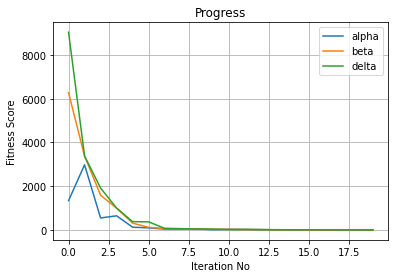

In [ ]:
plt.plot(np.array(history['alpha']) ,label='alpha')
plt.plot(np.array(history['beta']), label='beta')
plt.plot(np.array(history['delta']), label='delta')
plt.xlabel("Iteration No")
plt.ylabel("Fitness Score")
plt.title('Progress')
plt.grid()
plt.legend()
plt.savefig("graph")

In [ ]:
print(history['alpha'])
print(history['beta'])
print(history['delta'])

[1338.1921834452626, 2979.1009240267476, 548.8763952991753, 647.1334332524343, 126.62842203485712, 95.92760115989182, 41.32847200447196, 31.97292902473046, 48.54852064596508, 11.380138099672646, 29.545906635014074, 19.182883158531393, 15.118035507404098, 6.659690991051623, 5.118009760932707, 3.8813674053173544, 2.561664716111644, 2.5950924907082893, 2.430842924637649, 2.3027627198512386]
[6275.2571271169945, 3381.8198543971957, 1587.863712339079, 998.6973211065955, 312.2008052667653, 118.87294250465602, 66.87087799783309, 45.26324436307264, 48.54852064596508, 34.97492288365815, 29.545906635014074, 19.41768085992196, 16.29032132038084, 8.46897936102485, 5.890301003965806, 3.89460920301631, 3.5855407167969373, 2.5950924907082893, 2.441181824259284, 2.329901962941876]
[9039.939195630534, 3381.8198543971957, 1916.0665637386944, 998.6973211065955, 379.5102579871231, 371.2090931642296, 73.82019628219223, 60.15223539977475, 40.47744754979121, 38.44912360658589, 16.190329387092454, 25.19741196